# Imports

In [998]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [999]:
df_clean = pd.read_csv("data/data_clean.csv")

In [1000]:
np.random.seed(123)

In [1001]:
df_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_int
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,3
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,3
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1
...,...,...,...,...,...,...,...,...,...,...
16331,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,1
16332,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,2
16333,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,1
16334,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,3


# Feature engineering

## Pearson correlation 

We check the absolute value of the Pearson’s correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion.

<AxesSubplot:>

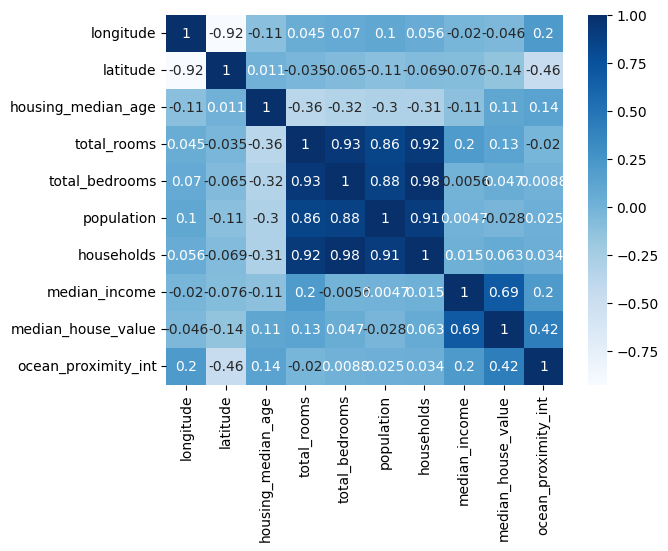

In [1002]:
cor = df_clean.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.Blues
           )

In [1003]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [1004]:
X = df_clean.drop(["median_house_value"], axis = 1)
y = df_clean["median_house_value"]
num_feats = 5

In [1005]:
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

5 selected features


Now, i will select the corresponding features from the original dataframe

In [1006]:
X_selected_1 = X.loc[:, cor_feature]

In [1007]:
X_selected_1["median_house_value"] = df_clean["median_house_value"]

In [1008]:
X_selected_1["population"] = df_clean["population"]

In [1009]:
X_selected_1["households"] = df_clean["households"]

In [1010]:
X_selected_1["total_bedrooms"] = df_clean["total_bedrooms"]

In [1011]:
X_selected = X_selected_1.drop(["latitude"], axis = 1)

In [1012]:
X_selected

,housing_median_age,total_rooms,ocean_proximity_int,median_income,median_house_value,population,households,total_bedrooms
0,6.0,1853.0,1,1.4817,72000.0,1397.0,417.0,473.0
1,8.0,2032.0,3,6.9133,274100.0,862.0,340.0,349.0
2,25.0,875.0,1,1.5536,58300.0,931.0,214.0,214.0
3,31.0,622.0,3,1.5284,200000.0,597.0,227.0,229.0
4,21.0,1922.0,1,4.0815,117900.0,1130.0,372.0,373.0
...,...,...,...,...,...,...,...,...
16331,20.0,1465.0,1,3.0625,93800.0,745.0,250.0,278.0
16332,49.0,2365.0,2,2.6133,103100.0,1131.0,458.0,504.0
16333,19.0,2531.0,1,4.4958,192600.0,1206.0,429.0,461.0
16334,39.0,2776.0,3,2.5750,153500.0,2546.0,773.0,840.0


## PCA 

In [1013]:
from sklearn.decomposition import PCA

In [1014]:
X_selected_1 = X_selected.drop(["median_house_value"], axis = 1)

In [1015]:
df_no_target = df_clean.drop(["median_house_value", "households"], axis = 1)

In [1016]:
pca = PCA(n_components=7) 
pca.fit(df_no_target) 
X_pca = pca.transform(df_no_target) 
#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)

shape of X_pca (16336, 7)


In [1017]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio) 

[9.51024548e-01 4.60512376e-02 2.90096010e-03 2.14300086e-05
 1.28543110e-06 3.96701982e-07 1.42568825e-07]


In [1018]:
df_pca = pd.DataFrame(X_pca, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])

In [1019]:
df_pca["median_house_value"] = X_selected["median_house_value"]

In [1020]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,median_house_value
0,-731.465918,308.840567,-39.000993,-24.515876,1.848921,-1.843321,-0.306179,72000.0
1,-819.172971,-255.702368,46.108324,-21.636887,-2.913106,2.321099,-0.196627,274100.0
2,-1842.543718,305.014419,40.232919,-7.326725,1.661626,-2.095013,-0.379850,58300.0
3,-2207.199512,115.979761,-43.956915,-1.924802,-1.895246,-1.621094,0.924510,200000.0
4,-799.574251,34.241527,38.432204,-9.012873,2.932452,0.057180,-0.875275,117900.0
...,...,...,...,...,...,...,...,...
16331,-1385.469273,-116.657798,31.128865,-10.845762,4.661965,-0.861753,-0.535923,93800.0
16332,-383.270747,-152.121137,-34.527142,19.874552,3.407107,-0.791083,0.197309,103100.0
16333,-210.514257,-159.180511,37.353677,-9.651197,3.646057,0.139394,-1.067121,192600.0
16334,637.873971,955.440797,-155.421466,9.669238,-1.465529,0.555478,-0.238621,153500.0


# Export the data

In [1021]:
df_export = X_selected.to_csv(r'data/df.csv', index=False)